In [1]:
import torch
import torch.nn as nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch.utils.data
import torchvision

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('MNIST_data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,0.5,0.5),(0.5,0.5,0.5))
                             ])),
   batch_size = 64,shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('MNIST_data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,0.5,0.5),(0.5,0.5,0.5))
                             ])),
   batch_size = 1000 , shuffle=True)

In [4]:
_ , (images , labels) = next(enumerate(train_loader))

In [5]:
images.shape , labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

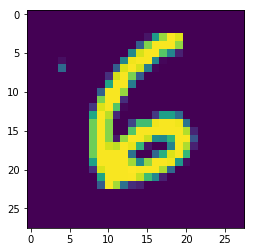

In [6]:
plt.imshow(images[0].numpy().reshape(28,28))

In [7]:
model = nn.Sequential(nn.Linear(784 , 256) , nn.ReLU() ,
                     nn.Linear(256 , 64) , nn.ReLU() , 
                     nn.Linear(64 , 10) , nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.01)

In [26]:
for epoch in range(10):
    tot_loss = 0
    for _ , (data , target) in enumerate(train_loader):
        optimizer.zero_grad()
        new_data = data.view(data.shape[0] , -1)
        output = model(new_data)
        loss = criterion(output , target)
        loss.backward()
        optimizer.step()
        tot_loss += loss.item()
    print('epoch ',epoch,':',tot_loss/len(train_loader))

epoch  0 : 0.7121358029623784
epoch  1 : 0.6970576602639929
epoch  2 : 0.6852271333177969
epoch  3 : 0.6748727423740603
epoch  4 : 0.6687556474384214
epoch  5 : 0.6641915029109414
epoch  6 : 0.6588574341937169
epoch  7 : 0.659961981528095
epoch  8 : 0.6571054936789754
epoch  9 : 0.6487284353547005


In [9]:
_ , (test_images , test_labels) = next(enumerate(test_loader))

In [27]:
predictions = model(test_images.view(test_images.shape[0],-1))

In [28]:
predictions.shape

torch.Size([1000, 10])

In [29]:
pred_array = predictions.detach().numpy()
ypred = np.array([None for _ in range(1000)])
for i in range(1000):
    maxm = -10000
    for j in range(10):
        if maxm < pred_array[i][j]:
            maxm = pred_array[i][j]
            ypred[i] = j 
ypred

array([9, 3, 9, 8, 9, 8, 7, 1, 7, 7, 4, 2, 0, 4, 4, 0, 9, 5, 8, 5, 3, 4,
       2, 5, 6, 1, 5, 1, 2, 1, 1, 5, 4, 4, 6, 7, 0, 4, 3, 3, 1, 0, 5, 6,
       8, 3, 9, 8, 2, 1, 4, 3, 4, 5, 1, 1, 0, 1, 8, 3, 4, 9, 4, 1, 3, 0,
       2, 1, 8, 6, 9, 9, 5, 1, 5, 9, 1, 0, 5, 2, 7, 9, 9, 1, 5, 0, 3, 0,
       7, 5, 2, 4, 1, 9, 5, 7, 7, 2, 9, 6, 6, 4, 0, 5, 5, 4, 0, 3, 4, 3,
       1, 5, 0, 4, 6, 4, 5, 3, 4, 1, 4, 2, 7, 6, 7, 5, 0, 1, 2, 9, 8, 0,
       0, 7, 4, 3, 6, 2, 1, 9, 9, 2, 1, 8, 8, 7, 4, 6, 9, 9, 3, 6, 0, 4,
       2, 7, 5, 4, 1, 4, 2, 0, 2, 4, 7, 1, 6, 2, 1, 2, 5, 1, 7, 1, 3, 6,
       1, 7, 0, 4, 1, 3, 8, 5, 9, 3, 4, 8, 0, 1, 6, 8, 1, 2, 7, 8, 4, 4,
       0, 1, 0, 4, 7, 4, 6, 2, 6, 8, 4, 2, 8, 4, 7, 8, 3, 4, 9, 3, 9, 9,
       1, 4, 1, 8, 9, 7, 1, 9, 8, 6, 5, 8, 0, 5, 2, 5, 4, 0, 7, 1, 4, 5,
       2, 7, 2, 4, 2, 2, 2, 7, 2, 7, 4, 9, 4, 9, 2, 8, 2, 8, 8, 3, 8, 5,
       0, 2, 5, 6, 7, 4, 2, 1, 7, 7, 2, 8, 1, 2, 7, 9, 3, 7, 0, 4, 1, 7,
       2, 4, 9, 1, 4, 5, 9, 1, 6, 5, 6, 8, 6, 1, 9,

In [30]:
print('accuracy : ' , (ypred == test_labels.numpy()).sum()/len(ypred))

accuracy :  0.781
